# IY014: Evaluation of Data Simulated

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import pandas as pd
from dataloaders import baseline_data_prep
%load_ext autoreload
%autoreload 2

In [2]:
# ==========================================
# CONFIGURATION
# ==========================================
# Adjust these paths to match your actual experiment folders/CSVs
EXPERIMENTS = [
    {
        "name": "1. Baseline (Sobol)",
        "data_dir": "data",
        "csv_name": "IY014_simulation_parameters_sobol.csv",
        "train_save_path":"IY014_static_train.pt",
        "val_save_path":"IY014_static_val.pt",
        "test_save_path":"IY014_static_test.pt",
        # "data_dir": "../EXP-25-IY011/data",
        # "csv_name": "IY011_simulation_parameters_sobol.csv",
        "color": "black"
    },
    {
        "name": "2. Mu Variation",
        # "data_dir": "data_mu_variation",
        "data_dir": "../EXP-25-IY011/data_mu_variation",
        "csv_name": "IY011_simulation_mu_parameters_sobol.csv",
        "train_save_path":"IY014_static_train.pt",
        "val_save_path":"IY014_static_val.pt",
        "test_save_path":"IY014_static_test.pt",
        "color": "blue"
    },
    {
        "name": "3. CV Variation",
        "data_dir": "data_cv_variation",
        "csv_name": "IY014_simulation_cv_parameters_sobol.csv",
        "train_save_path":"IY014_static_train.pt",
        "val_save_path":"IY014_static_val.pt",
        "test_save_path":"IY014_static_test.pt",
        # "data_dir": "../EXP-25-IY011/data_cv_variation",
        # "csv_name": "IY011_simulation_cv_parameters_sobol.csv",
        "color": "green"
    },
    {
        "name": "4. Tac Variation",
        "data_dir": "data_t_ac_variation",
        "csv_name": "IY014_simulation_t_ac_parameters_sobol.csv",
        "train_save_path":"IY014_static_train.pt",
        "val_save_path":"IY014_static_val.pt",
        "test_save_path":"IY014_static_test.pt",
        # "data_dir": "../EXP-25-IY011/data_t_ac_variation",
        # "csv_name": "IY011_simulation_t_ac_parameters_sobol.csv",
        "color": "red"
    }
]


# check that each dataset has the expected stats

In [3]:
def plot_obs_vs_target(ax, df, target_col, obs_col, title, color):
    """Helper to create a single scatter plot with y=x line."""
    if target_col not in df.columns or obs_col not in df.columns:
        ax.text(0.5, 0.5, f"Column missing:\n{target_col} or {obs_col}", 
                ha='center', va='center', transform=ax.transAxes)
        return

    # Scatter Plot
    ax.scatter(df[target_col], df[obs_col], alpha=0.5, marker='.', color=color)
    
    # Identity Line (y=x)
    min_val = min(df[target_col].min(), df[obs_col].min())
    max_val = max(df[target_col].max(), df[obs_col].max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal (y=x)', linewidth=1.5)
    
    # Aesthetics
    ax.set_xlabel(f'{title} Target')
    ax.set_ylabel(f'{title} Observed')
    ax.set_title(f'{title} Accuracy')
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.legend()

Loading results for: 1. Baseline (Sobol)...


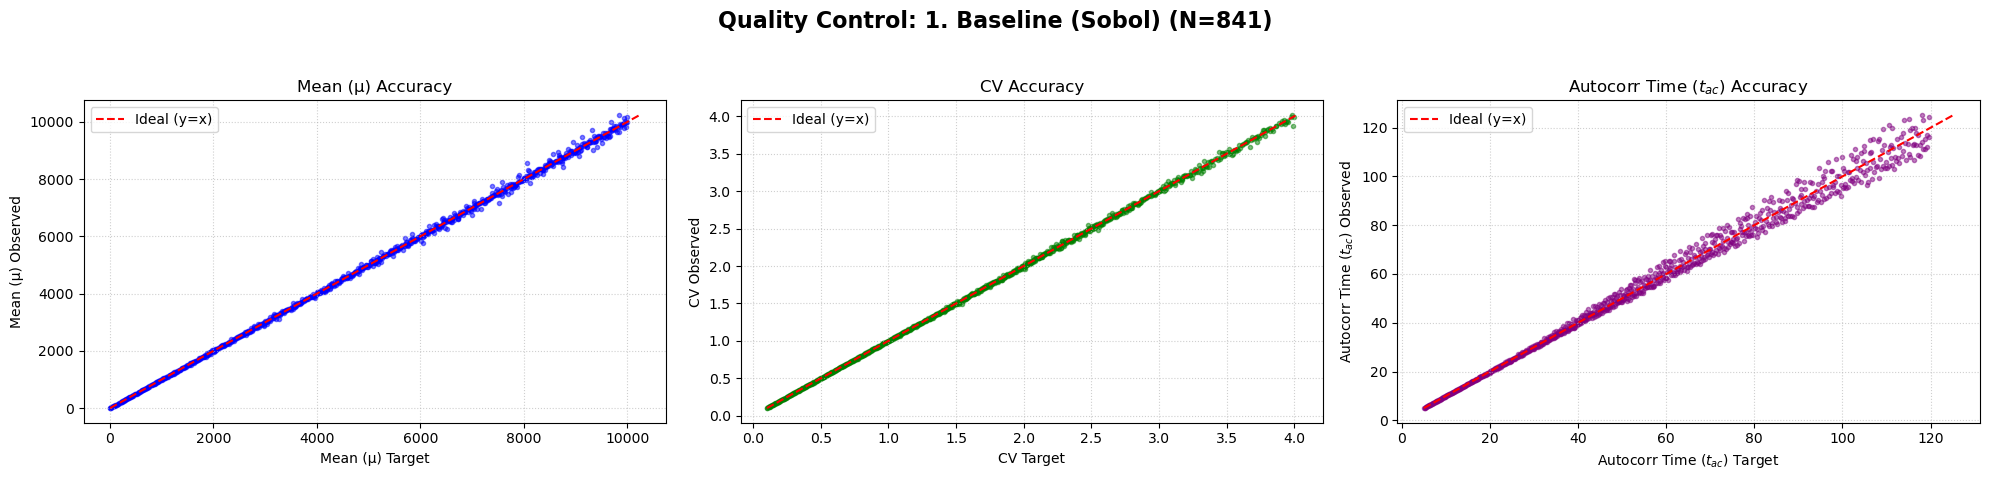

Loading results for: 2. Mu Variation...


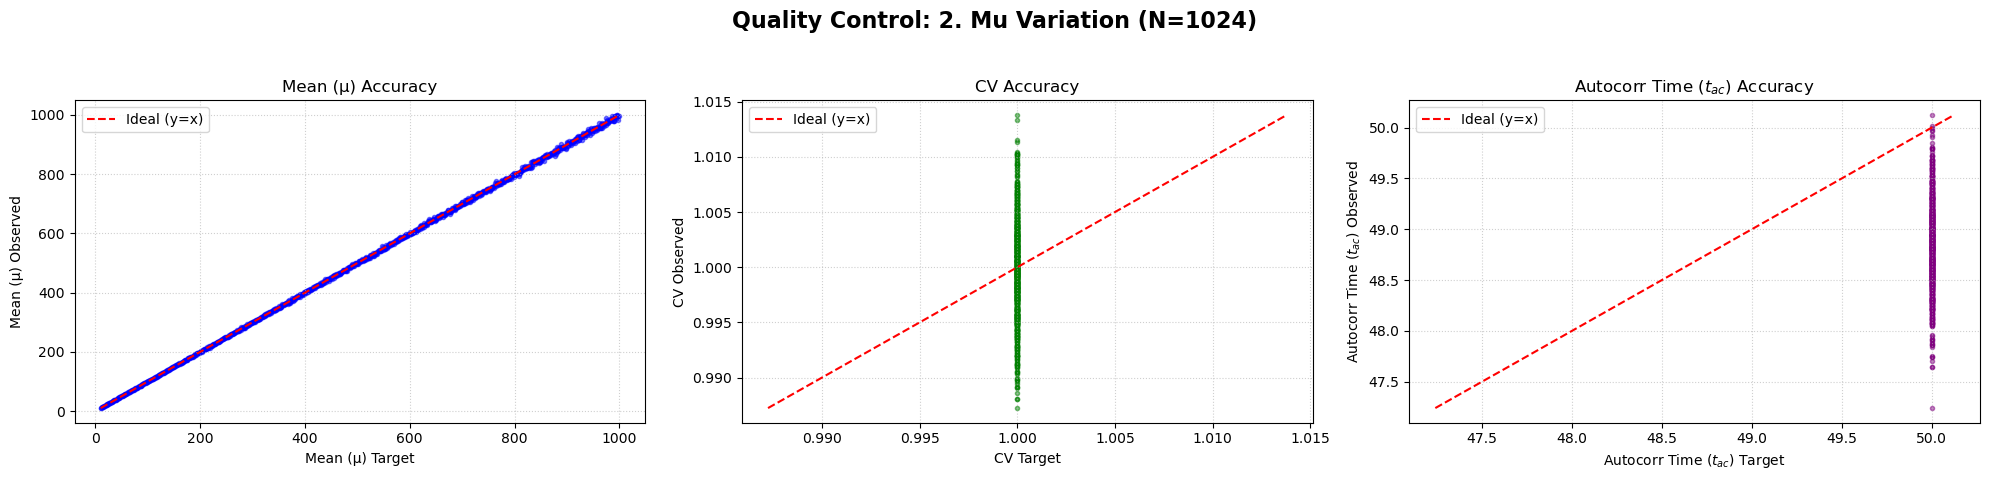

Loading results for: 3. CV Variation...


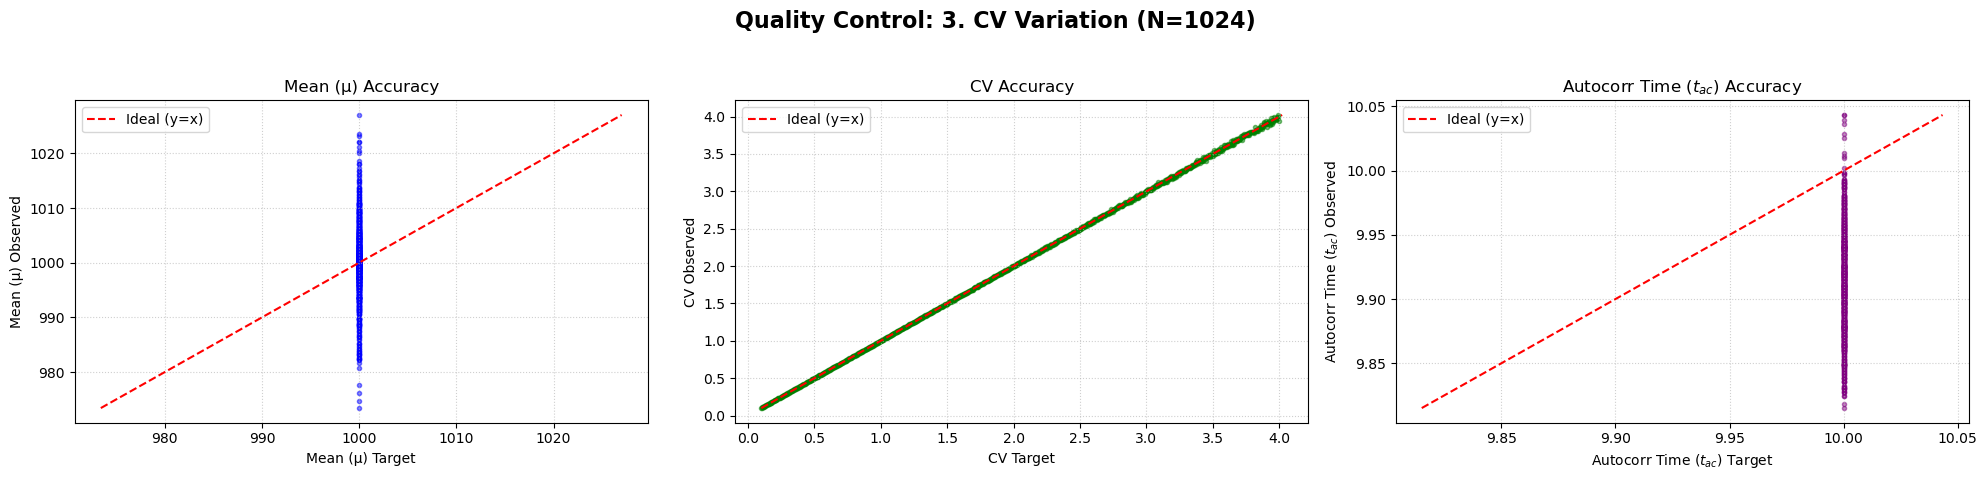

Loading results for: 4. Tac Variation...


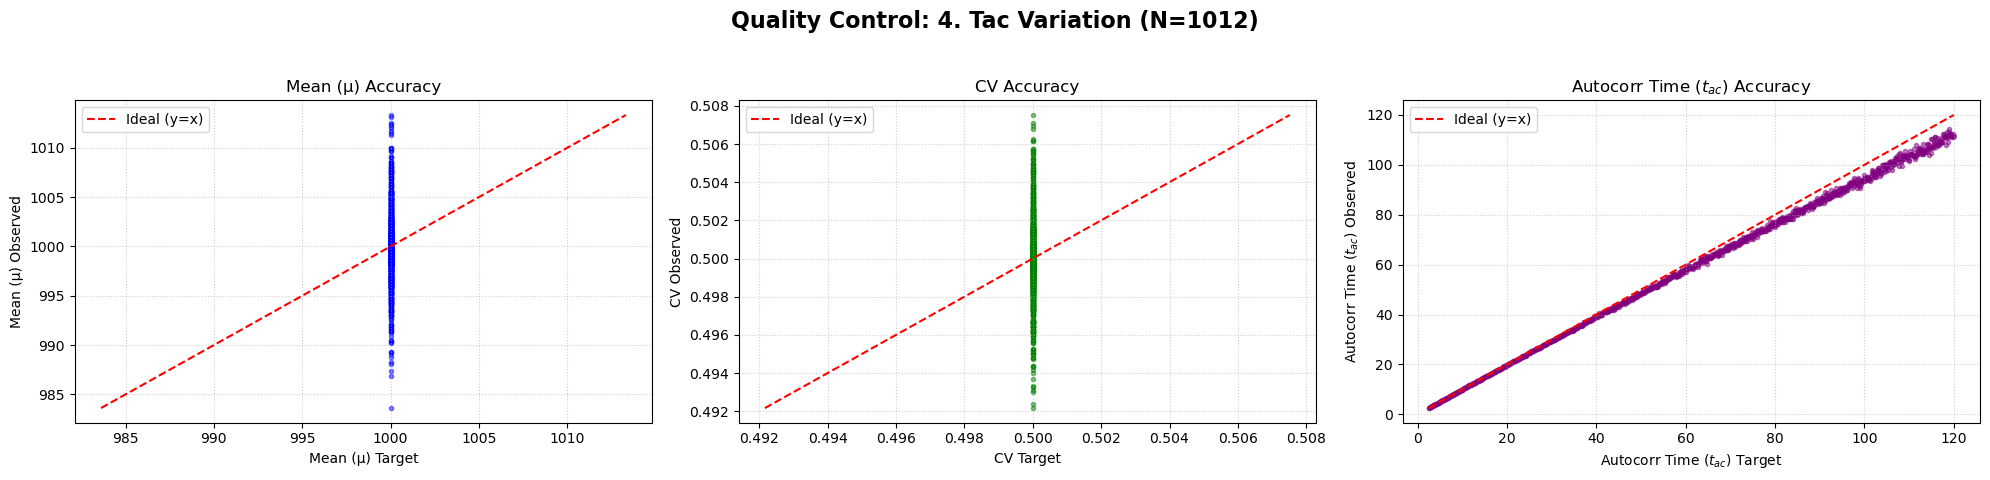

In [4]:
script_dir = Path.cwd() # Current working directory (works best in Notebooks)

for exp in EXPERIMENTS:
    csv_path = script_dir / exp["data_dir"] / exp["csv_name"]
    
    if not csv_path.exists():
        print(f"⚠️ Skipping {exp['name']}: File not found at {csv_path}")
        continue

    print(f"Loading results for: {exp['name']}...")
    try:
        df = pd.read_csv(csv_path)
        # filter out only successful simulations with no error_message, and mean_rel_error_pct < 10, cv_rel_error_pct  < 10, & t_ac_rel_error_pct < 10
        df = df[(df['success'] == True) & 
                            (df['error_message'].isna()) &
                            (df['mean_rel_error_pct'] < 10) & 
                            (df['cv_rel_error_pct'] < 10) & 
                            (df['t_ac_rel_error_pct'] < 10)]
        
        # Create a figure with 3 subplots (Mu, CV, Tac)
        fig, axes = plt.subplots(1, 3, figsize=(20, 5))
        fig.suptitle(f"Quality Control: {exp['name']} (N={len(df)})", fontsize=16, weight='bold')

        # 1. Plot Mu
        plot_obs_vs_target(axes[0], df, 'mu_target', 'mu_observed', 'Mean (μ)', 'blue')

        # 2. Plot CV
        plot_obs_vs_target(axes[1], df, 'cv_target', 'cv_observed', 'CV', 'green')

        # 3. Plot Tac
        plot_obs_vs_target(axes[2], df, 't_ac_target', 't_ac_observed', 'Autocorr Time ($t_{ac}$)', 'purple')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
        plt.show()
        
    except Exception as e:
        print(f"❌ Error processing {exp['name']}: {e}")

# compare SVM benchmarking scores vs transformer scores for each experiment

In [5]:
# from output logs of each experiment (IY011_baseline_model_training_5*.out)
# # t_ac experiment 
# test_acc_tac = 0.50 
# test_acc_tac_shuffled = 0.50
# svm_acc_tac = 0.50
# # mu experiment
# test_acc_mu = 0.76
# test_acc_mu_shuffled = 0.50
# svm_acc_mu = 0.76
# # cv experiment
# test_acc_cv = 0.51
# test_acc_cv_shuffled = 0.50
# svm_acc_cv = 0.57   
# ==================================
# from IY014_baseline_model_training*.out
# baseline experiment (all stats varying together)
test_acc = 0.8667
test_acc_shuffled = 0.8617
svm_acc = 0.77
# t_ac experiment 
test_acc_tac = 0.8850
test_acc_tac_shuffled = 0.6017
svm_acc_tac = 0.82
# mu experiment
test_acc_mu = 1.00
test_acc_mu_shuffled = 1.00
svm_acc_mu = 1.00
# cv experiment
test_acc_cv = 1.00
test_acc_cv_shuffled = 1.00
svm_acc_cv = 0.78


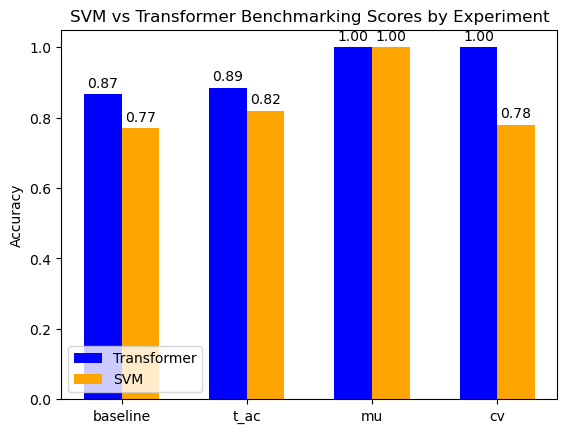

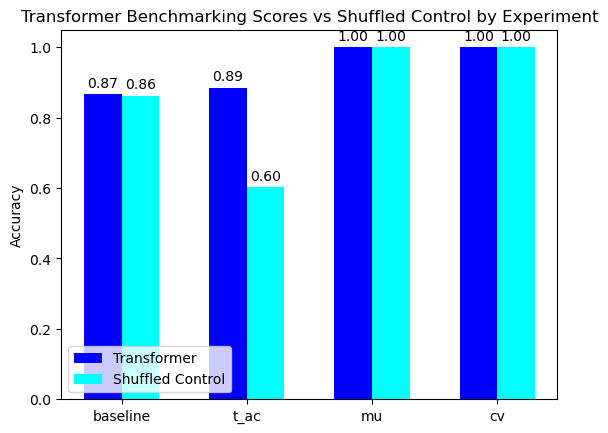

In [6]:
# plot results (transformer vs SVM)
labels = ['baseline','t_ac', 'mu', 'cv']
transformer_scores = [test_acc, test_acc_tac, test_acc_mu, test_acc_cv]
svm_scores = [svm_acc, svm_acc_tac, svm_acc_mu, svm_acc_cv]
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, transformer_scores, width, label='Transformer', color ='blue')
rects2 = ax.bar(x + width/2, svm_scores, width, label='SVM', color ='orange')
# Add value labels on top of bars
ax.bar_label(rects1, fmt='%.2f', padding=3)
ax.bar_label(rects2, fmt='%.2f', padding=3)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('SVM vs Transformer Benchmarking Scores by Experiment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower left')
plt.show()
# plot results showing shuffled control scores
shuffled_scores = [test_acc_shuffled, test_acc_tac_shuffled, test_acc_mu_shuffled, test_acc_cv_shuffled]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, transformer_scores, width, label='Transformer', color='blue')
rects2 = ax.bar(x + width/2, shuffled_scores, width, label='Shuffled Control', color='cyan')
# Add value labels on top of bars
ax.bar_label(rects1, fmt='%.2f', padding=3)
ax.bar_label(rects2, fmt='%.2f', padding=3)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Transformer Benchmarking Scores vs Shuffled Control by Experiment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower left')
plt.show()

## Investigate reason for low SVM score in cv experiment

In [ ]:
from dataloaders import load_loader_from_disk

BASELINE_DATA_ROOT = Path(EXPERIMENTS[0]["data_dir"])
MU_DATA_ROOT = Path(EXPERIMENTS[1]["data_dir"])
CV_DATA_ROOT = Path(EXPERIMENTS[2]["data_dir"]) 
TAC_DATA_ROOT = Path(EXPERIMENTS[3]["data_dir"])

baseline_train_save_path = BASELINE_DATA_ROOT / EXPERIMENTS[0]["train_save_path"]
baseline_val_save_path   = BASELINE_DATA_ROOT / EXPERIMENTS[0]["val_save_path"]
baseline_test_save_path  = BASELINE_DATA_ROOT / EXPERIMENTS[0]["test_save_path"]
baseline_train_loader = load_loader_from_disk(baseline_train_save_path)
baseline_val_loader = load_loader_from_disk(baseline_val_save_path)
baseline_test_loader = load_loader_from_disk(baseline_test_save_path)

cv_train_save_path = CV_DATA_ROOT / EXPERIMENTS[2]["train_save_path"]
cv_val_save_path   = CV_DATA_ROOT / EXPERIMENTS[2]["val_save_path"]
cv_test_save_path  = CV_DATA_ROOT / EXPERIMENTS[2]["test_save_path"]
cv_train_loader = load_loader_from_disk(cv_train_save_path)
cv_val_loader = load_loader_from_disk(cv_val_save_path)
cv_test_loader = load_loader_from_disk(cv_test_save_path)   

tac_train_save_path = TAC_DATA_ROOT / EXPERIMENTS[3]["train_save_path"]
tac_val_save_path   = TAC_DATA_ROOT / EXPERIMENTS[3]["val_save_path"]
tac_test_save_path  = TAC_DATA_ROOT / EXPERIMENTS[3]["test_save_path"]
tac_train_loader = load_loader_from_disk(tac_train_save_path)
tac_val_loader = load_loader_from_disk(tac_val_save_path)
tac_test_loader = load_loader_from_disk(tac_test_save_path)

mu_train_save_path = MU_DATA_ROOT / EXPERIMENTS[1]["train_save_path"]
mu_val_save_path   = MU_DATA_ROOT / EXPERIMENTS[1]["val_save_path"]
mu_test_save_path  = MU_DATA_ROOT / EXPERIMENTS[1]["test_save_path"]
mu_train_loader = load_loader_from_disk(mu_train_save_path)
mu_val_loader = load_loader_from_disk(mu_val_save_path)
mu_test_loader = load_loader_from_disk(mu_test_save_path)   

📂 Loading static data from data/IY014_static_train.pt...
📂 Loading static data from data/IY014_static_val.pt...
📂 Loading static data from data/IY014_static_test.pt...
📂 Loading static data from data_cv_variation/IY014_static_train.pt...
📂 Loading static data from data_cv_variation/IY014_static_val.pt...
📂 Loading static data from data_cv_variation/IY014_static_test.pt...
📂 Loading static data from data_t_ac_variation/IY014_static_train.pt...
📂 Loading static data from data_t_ac_variation/IY014_static_val.pt...
📂 Loading static data from data_t_ac_variation/IY014_static_test.pt...
📂 Loading static data from ../EXP-25-IY011/data_mu_variation/IY014_static_train.pt...
📂 Loading static data from ../EXP-25-IY011/data_mu_variation/IY014_static_val.pt...
📂 Loading static data from ../EXP-25-IY011/data_mu_variation/IY014_static_test.pt...


In [8]:
def visualize_batch(loader, exp_name, color):
    """
    Fetches one batch and plots samples from it.
    """
    try:
        # Fetch one batch
        X, y = next(iter(loader)) 
        # X shape: (Batch, Total_Time, 1)
        # y shape: (Batch, 1)
    except StopIteration:
        print(f"⚠️ Could not load batch for {exp_name}")
        return

    print(f"\n=== Visualizing: {exp_name} ===")
    print(f"Batch Shape: {X.shape}")
    print(f"Batch Stats -> Mean: {X.mean():.4f} | Std: {X.std():.4f} (Should be ~0.0 and ~1.0)")

    # Plot 4 samples
    fig, axes = plt.subplots(2, 4, figsize=(14, 8), sharex=True, sharey=True)
    fig.suptitle(f"{exp_name}", fontsize=16)

    for i, ax in enumerate(axes.flatten()):
        if i >= len(X): break
        
        traj = X[i].flatten().numpy()
        label = y[i].item()
        
        # 1. Plot the Time Series
        ax.plot(traj, color=color, linewidth=0.8, alpha=0.8)
        
        # 2. Add visual aid for stats
        mean_val = traj.mean()
        std_val = traj.std()
        
        # Title with metadata
        label_str = "POSITIVE (Same)" if label == 1.0 else "NEGATIVE (Diff)"
        ax.set_title(f"Sample {i}: {label_str}\n$\mu$={mean_val:.2f}, $\sigma$={std_val:.2f}", fontsize=10)
        ax.grid(True, alpha=0.3)
        
        # 3. Highlight the Zero line (since it's normalized)
        ax.axhline(0, color='black', linestyle='--', alpha=0.5, linewidth=1)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()
    
    # 4. Plot Histograms (Density) to see the "Shape" of the signal values
    plt.figure(figsize=(10,8))
    for i in range(8):
        sns.kdeplot(X[i].flatten().numpy(), color=color, alpha=i*0.1, fill=True, label=f"Sample {i}")
    plt.title(f"Value Distribution (Density) - {exp_name}")
    plt.xlabel("Normalized Intensity Value (Sigma)")
    plt.axvline(0, color='black', linestyle='--')
    plt.legend()
    plt.show()


=== Visualizing: 1. Baseline (Sobol) ===
Batch Shape: torch.Size([64, 3623, 1])
Batch Stats -> Mean: 0.0000 | Std: 0.9999 (Should be ~0.0 and ~1.0)


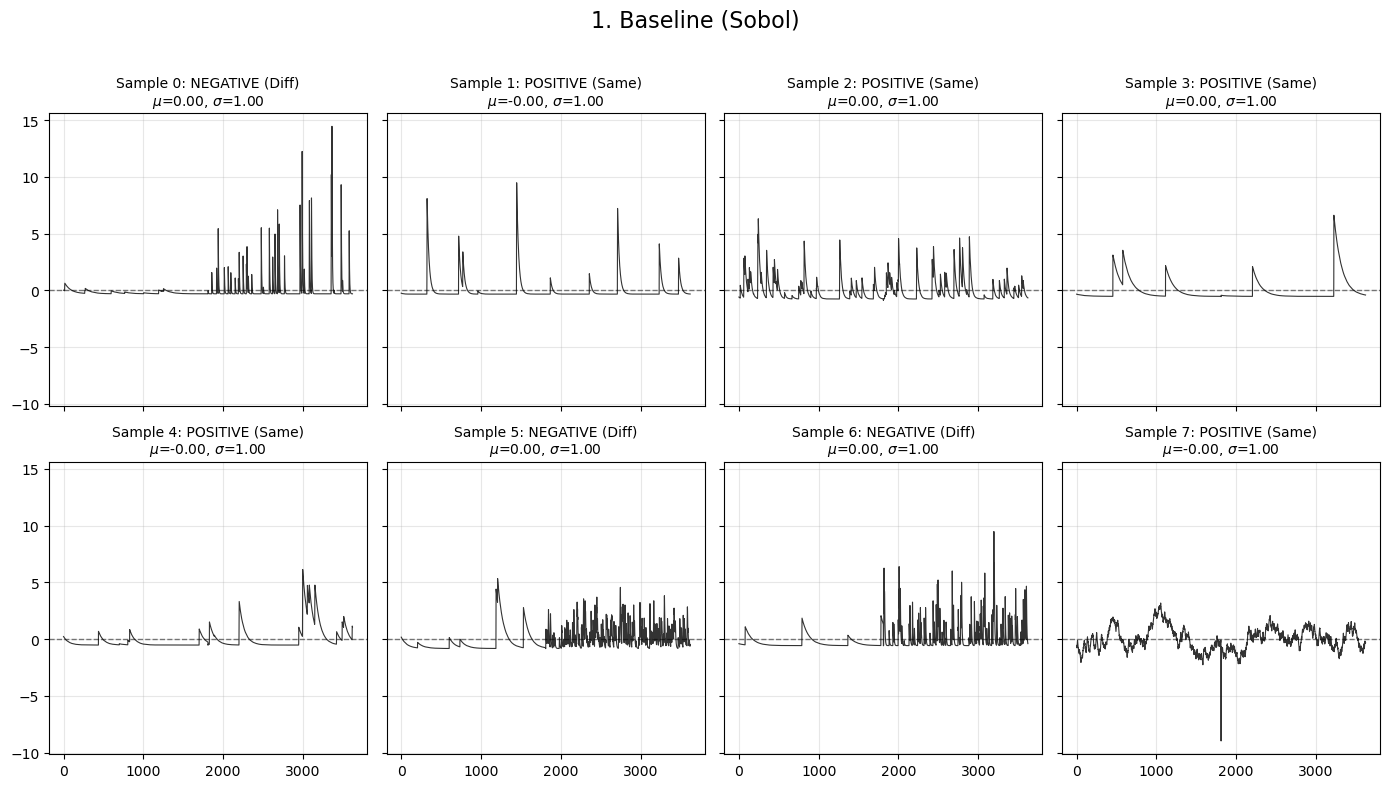

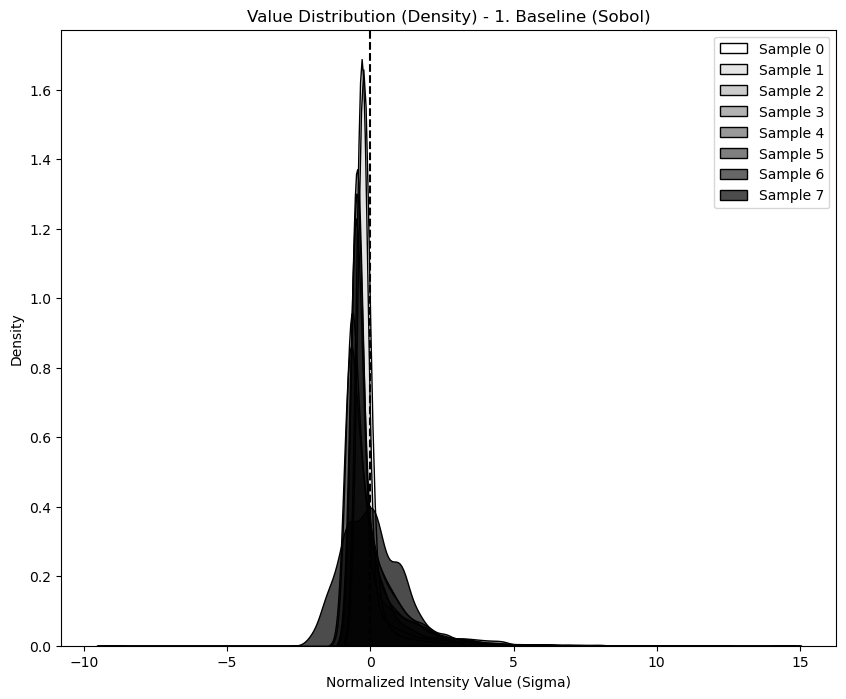


=== Visualizing: 2. Mu Variation ===
Batch Shape: torch.Size([64, 5021, 1])
Batch Stats -> Mean: 0.0000 | Std: 0.9999 (Should be ~0.0 and ~1.0)


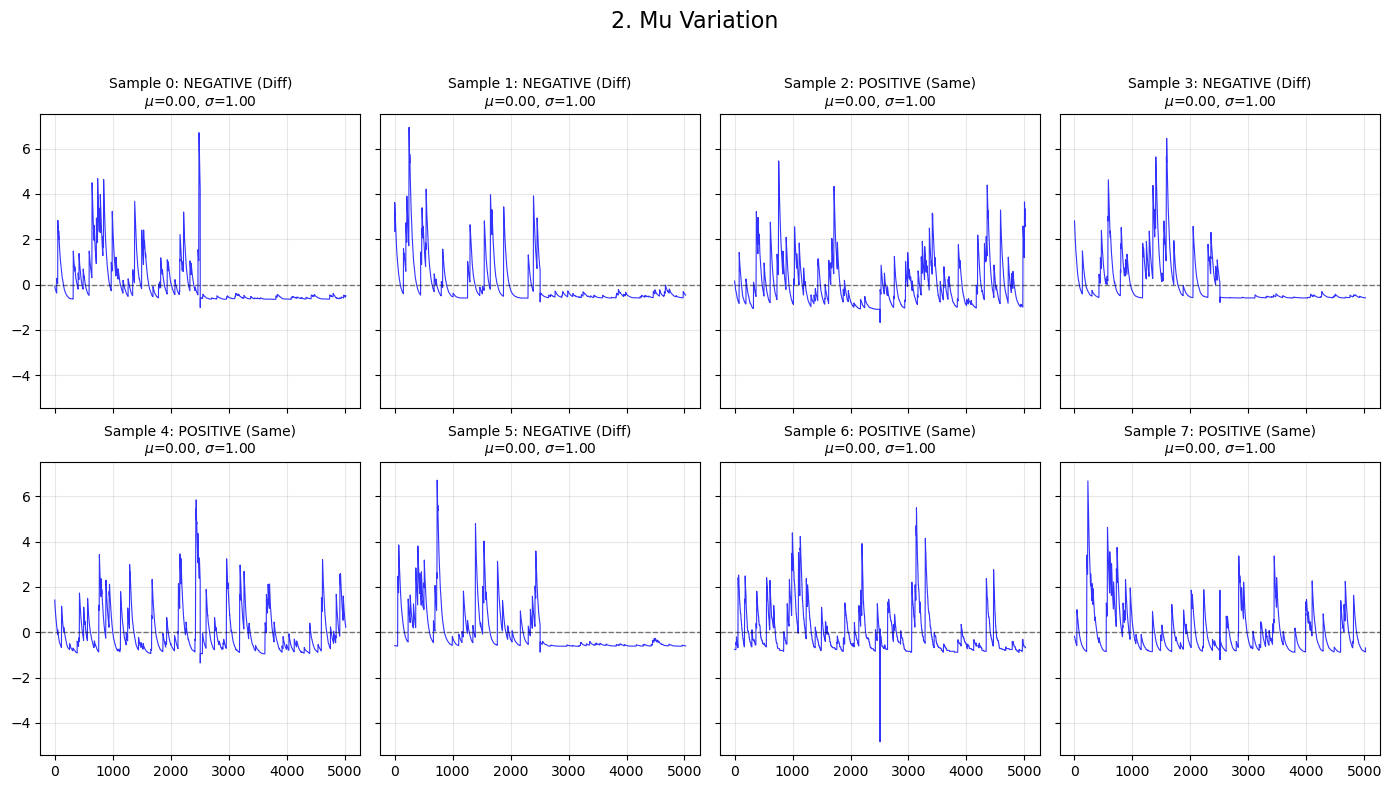

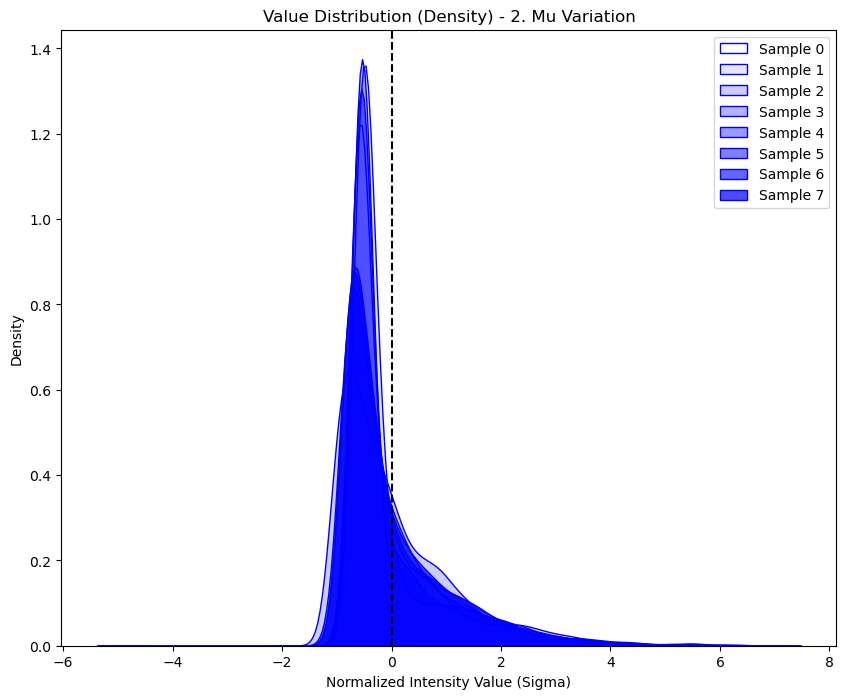


=== Visualizing: 3. CV Variation ===
Batch Shape: torch.Size([64, 5821, 1])
Batch Stats -> Mean: 0.0000 | Std: 0.9999 (Should be ~0.0 and ~1.0)


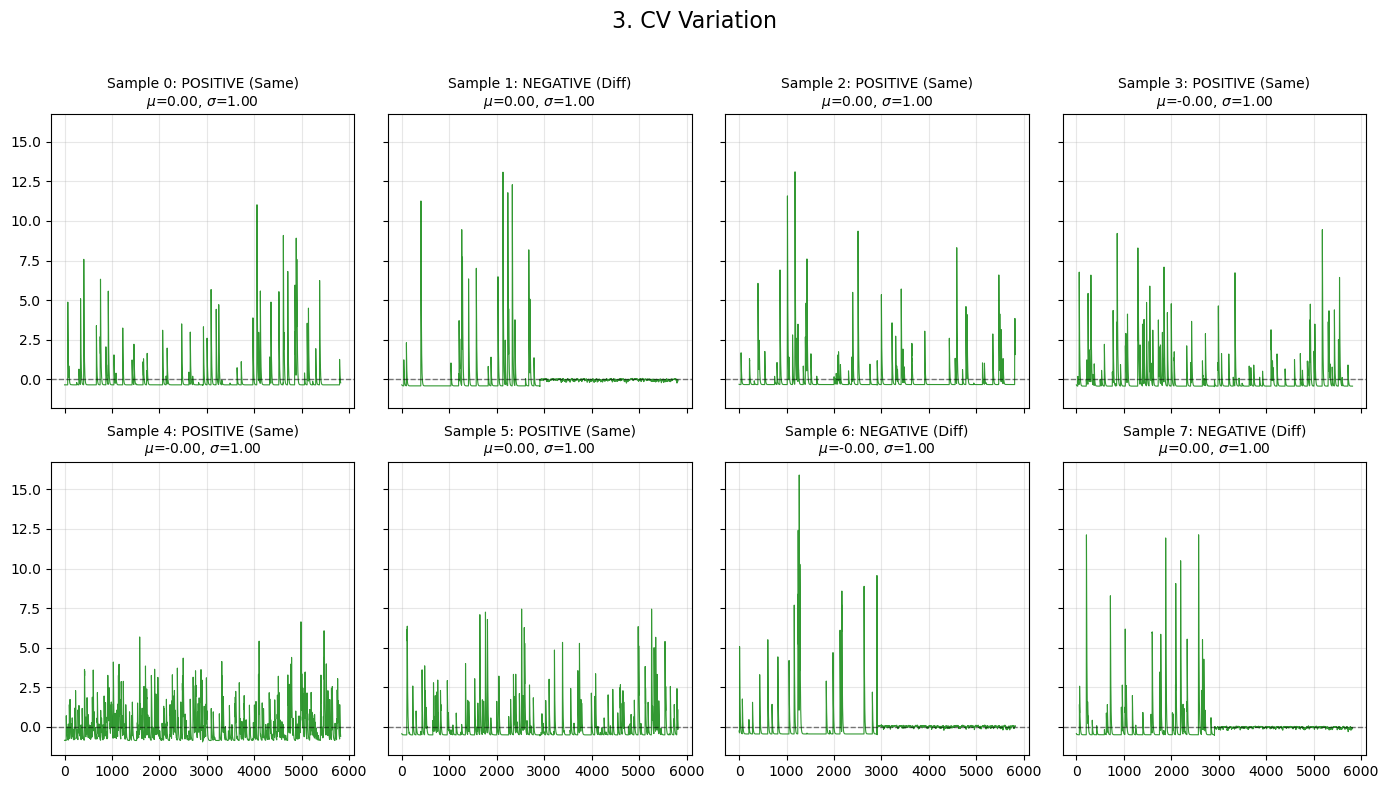

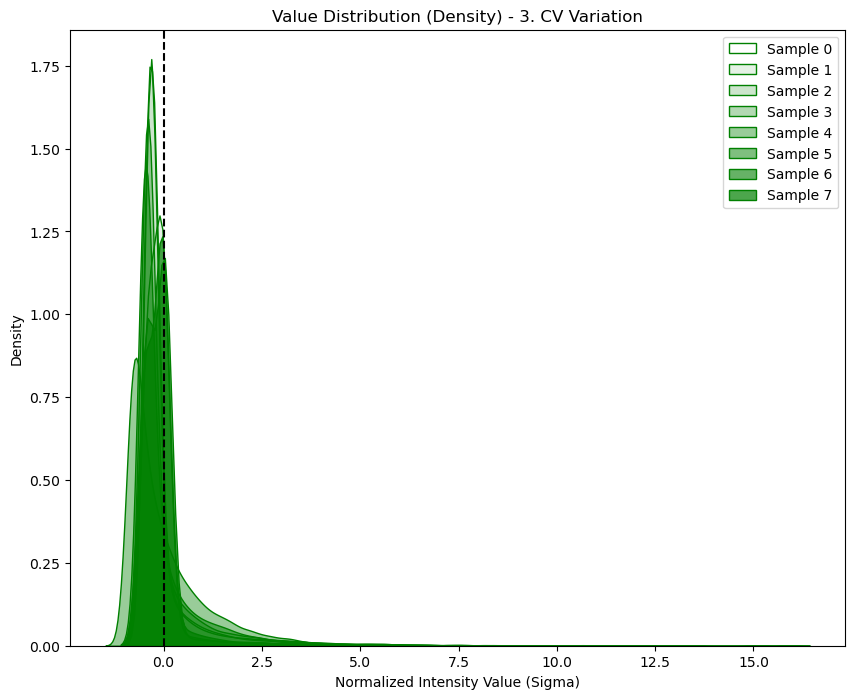


=== Visualizing: 4. Tac Variation ===
Batch Shape: torch.Size([64, 3623, 1])
Batch Stats -> Mean: -0.0000 | Std: 0.9999 (Should be ~0.0 and ~1.0)


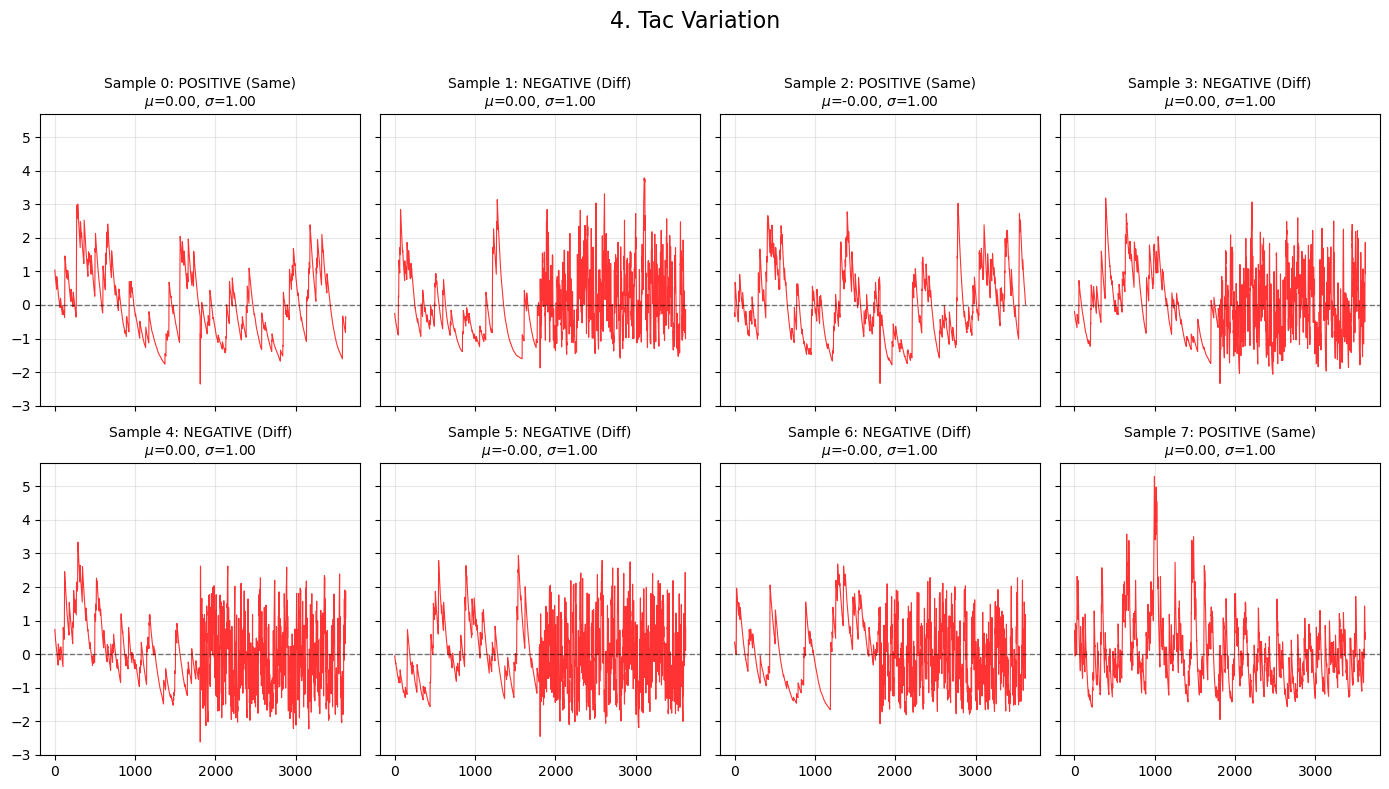

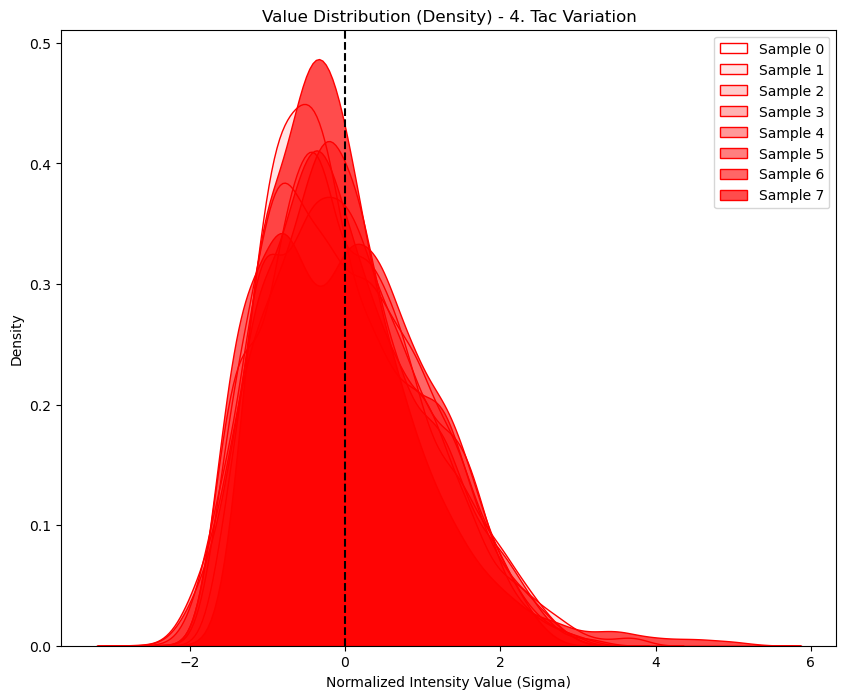

In [9]:
for exp in EXPERIMENTS:
    if exp["name"] == "1. Baseline (Sobol)":
        visualize_batch(baseline_train_loader, exp["name"], exp["color"])
    elif exp["name"] == "2. Mu Variation":
        visualize_batch(mu_train_loader, exp["name"], exp["color"])
    elif exp["name"] == "3. CV Variation":
        visualize_batch(cv_train_loader, exp["name"], exp["color"])
    elif exp["name"] == "4. Tac Variation":
        visualize_batch(tac_train_loader, exp["name"], exp["color"])

In [10]:
# verify the results seen from training script
def extract_data_for_svm(loader):
    """
    Extracts all batches from a DataLoader and flattens them for SVM input.
    Input X: (Batch, Time, Features) -> Output X: (Total_Samples, Time * Features)
    """
    X_list = []
    y_list = []
    
    print(f"Extracting data from loader for SVM...")
    
    with torch.no_grad():
        for X_batch, y_batch in loader:
            # Move to CPU and convert to numpy
            X_np = X_batch.cpu().numpy()
            y_np = y_batch.cpu().numpy()
            
            # Flatten the time series: 
            # (Batch, Seq_Len, 1) -> (Batch, Seq_Len)
            # This turns the time series into a long feature vector
            X_flat = X_np.reshape(X_np.shape[0], -1)
            
            X_list.append(X_flat)
            y_list.append(y_np)
            
    # Concatenate all batches
    return np.vstack(X_list), np.concatenate(y_list)

Dataset: Baseline
Extracting data for visualization...
Analyzing (3000, 3623) samples...
Running PCA...
Running t-SNE (this might take a moment)...
Training Diagnostic SVM...
Extracting data from loader for SVM...


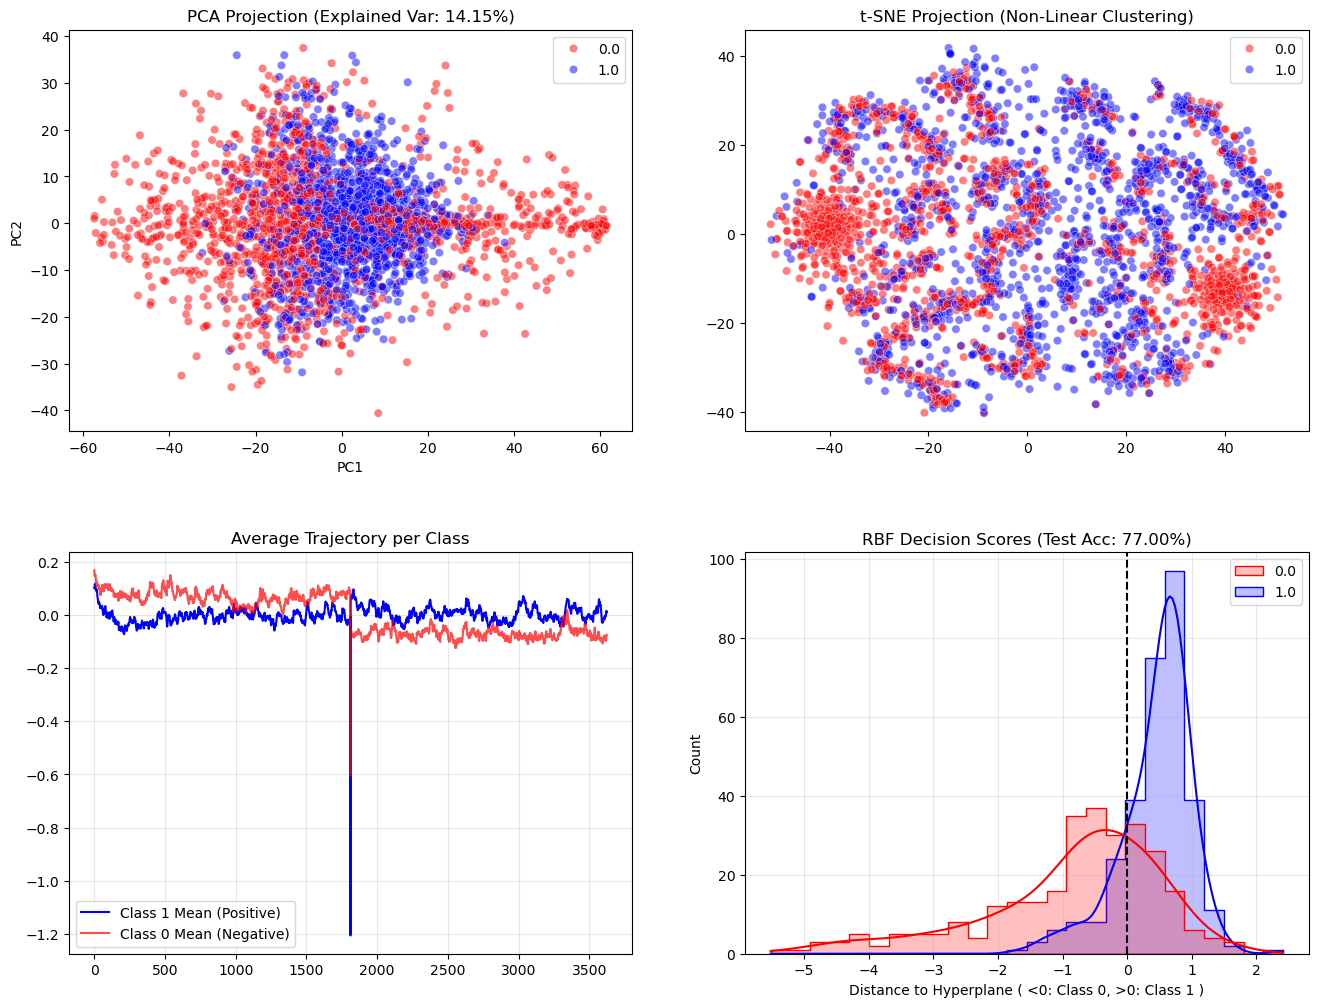

Dataset: TAC Variation
Extracting data for visualization...
Analyzing (3000, 3623) samples...
Running PCA...
Running t-SNE (this might take a moment)...
Training Diagnostic SVM...
Extracting data from loader for SVM...


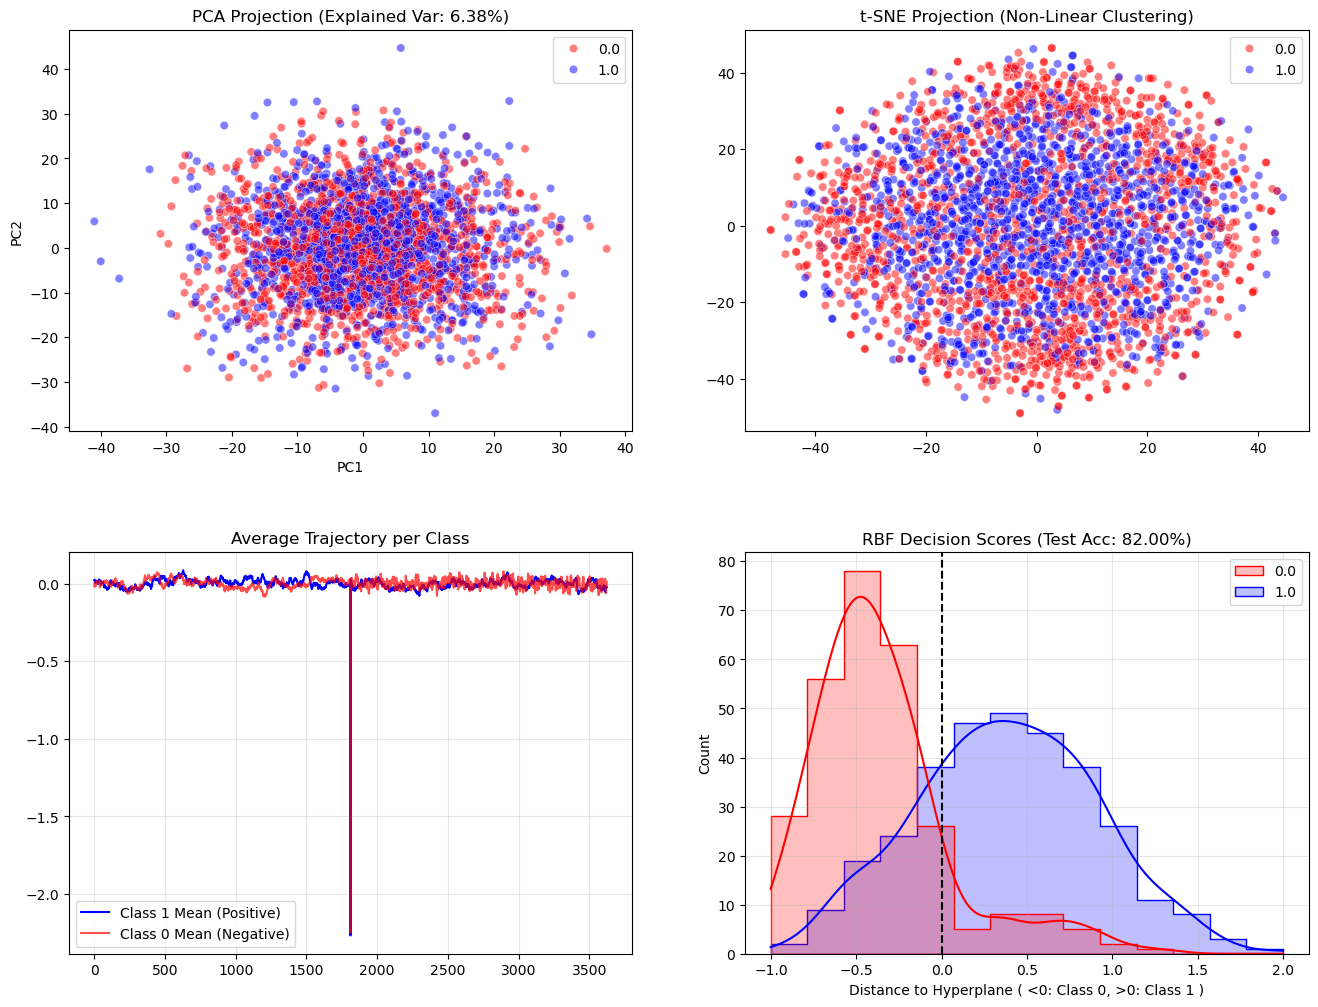

Dataset: MU Variation
Extracting data for visualization...
Analyzing (3000, 5021) samples...
Running PCA...
Running t-SNE (this might take a moment)...
Training Diagnostic SVM...
Extracting data from loader for SVM...


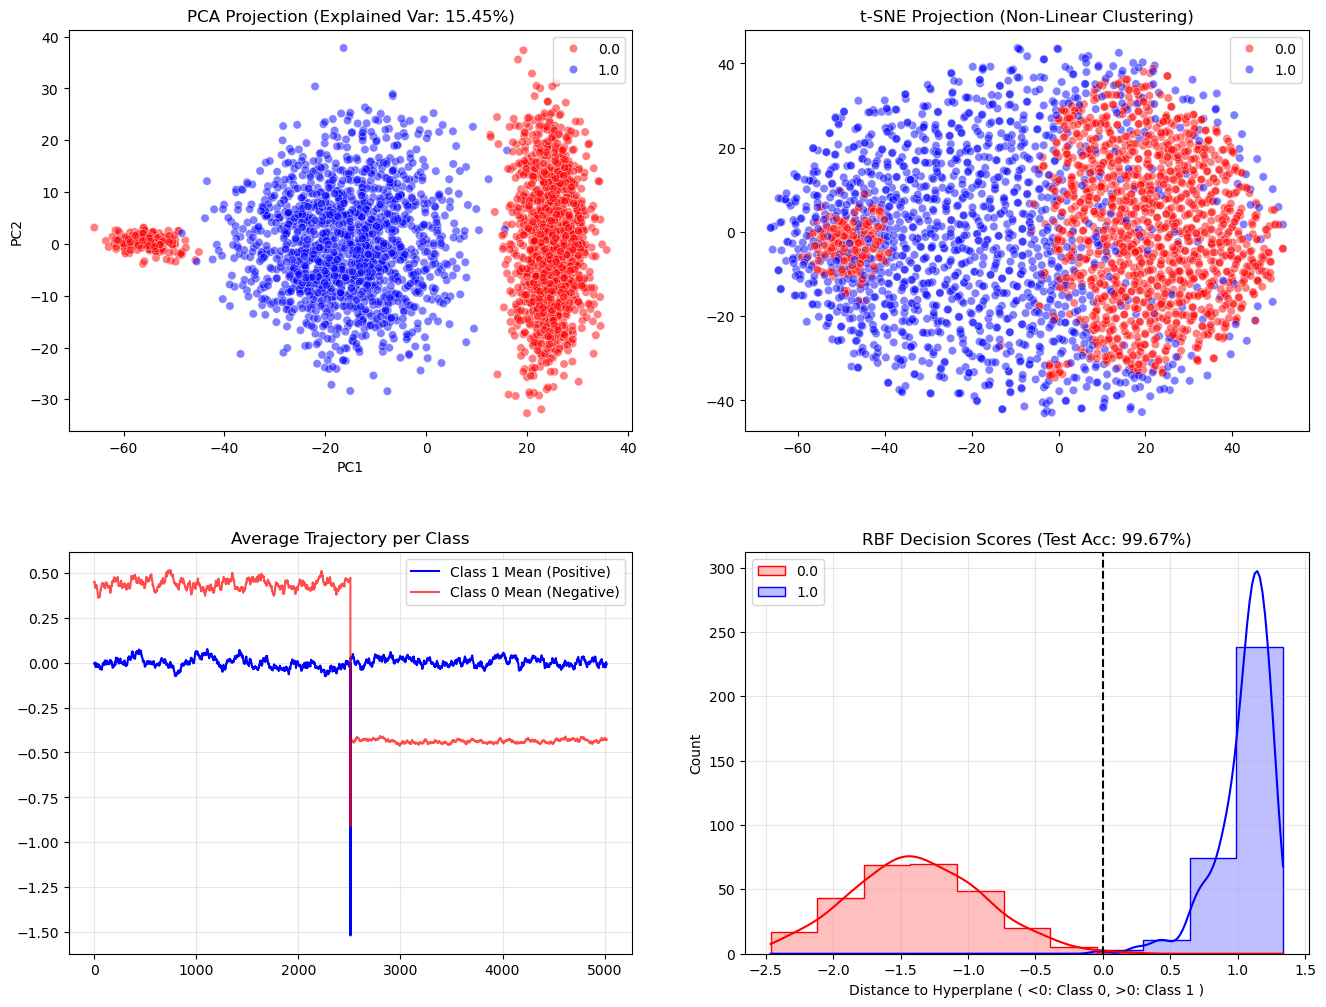

Dataset: CV Variation
Extracting data for visualization...
Analyzing (3000, 5821) samples...
Running PCA...
Running t-SNE (this might take a moment)...
Training Diagnostic SVM...
Extracting data from loader for SVM...


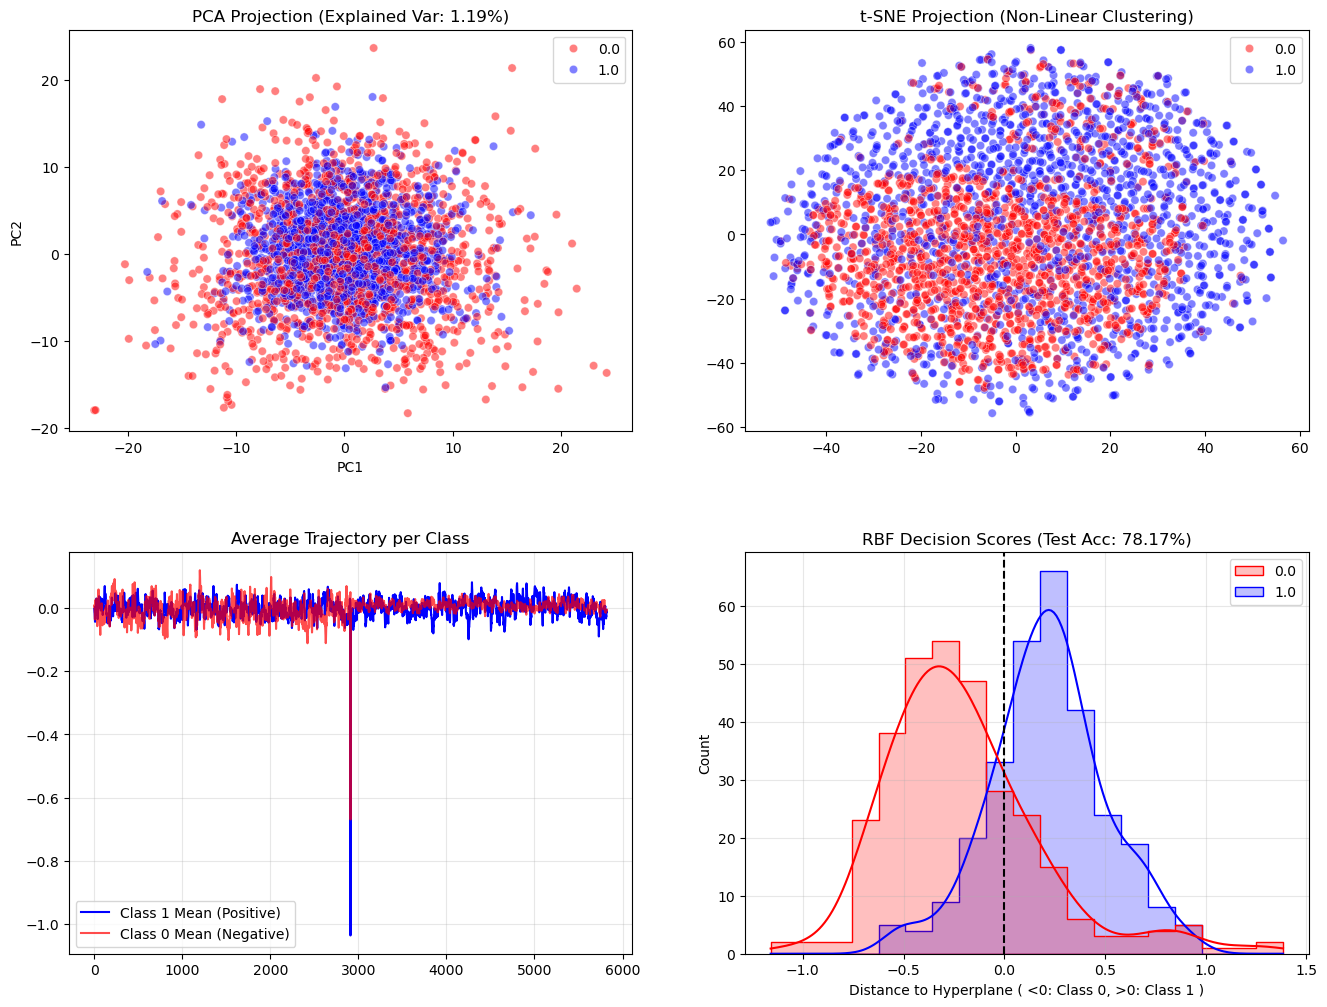

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
import torch

def visualize_svm_learning(train_loader, test_loader, max_samples=3000):
    """
    Diagnoses why an SVM might be failing by visualizing the data geometry
    and linear decision boundaries.
    """
    print("Extracting data for visualization...")
    
    # 1. Collect Data from Loader
    X_list, y_list = [], []
    count = 0
    
    for X, y in train_loader:
        # X shape: (Batch, Time, 1) -> Flatten to (Batch, Time)
        X_flat = X.squeeze().cpu().numpy()
        y_flat = y.squeeze().cpu().numpy()
        
        X_list.append(X_flat)
        y_list.append(y_flat)
        
        count += X.shape[0]
        if count >= max_samples: break
            
    X_all = np.concatenate(X_list, axis=0)[:max_samples]
    y_all = np.concatenate(y_list, axis=0)[:max_samples]
    
    print(f"Analyzing {X_all.shape} samples...")

    # Set up plots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    plt.subplots_adjust(hspace=0.3)

    # --- Plot A: PCA Projection (Global Variance) ---
    print("Running PCA...")
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_all)
    
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_all, palette={0:'red', 1:'blue'}, alpha=0.5, ax=axes[0,0])
    axes[0,0].set_title(f"PCA Projection (Explained Var: {pca.explained_variance_ratio_.sum():.2%})")
    axes[0,0].set_xlabel("PC1")
    axes[0,0].set_ylabel("PC2")

    # --- Plot B: t-SNE Projection (Local Manifold) ---
    print("Running t-SNE (this might take a moment)...")
    tsne = TSNE(n_components=2, init='pca', learning_rate='auto', random_state=42)
    X_tsne = tsne.fit_transform(X_all)
    
    sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_all, palette={0:'red', 1:'blue'}, alpha=0.5, ax=axes[0,1])
    axes[0,1].set_title("t-SNE Projection (Non-Linear Clustering)")

    # --- Plot C: Average Profiles ---
    # SVMs often rely on the mean difference between classes.
    # If these look identical, a linear SVM has nothing to work with.
    mean_pos = X_all[y_all==1].mean(axis=0)
    mean_neg = X_all[y_all==0].mean(axis=0)
    
    axes[1,0].plot(mean_pos, color='blue', label='Class 1 Mean (Positive)')
    axes[1,0].plot(mean_neg, color='red', label='Class 0 Mean (Negative)', alpha=0.7)
    axes[1,0].set_title("Average Trajectory per Class")
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)

    # --- Plot D: Linear SVM Weights (Feature Importance) ---
    # We train a quick SVM to see what it *tries* to learn.
    print("Training Diagnostic SVM...")
    svm = SVC(C=1.0, gamma='scale', kernel='rbf')
    svm.fit(X_all, y_all)
    
    # Get the "Distance to boundary" for every point
    X_test_svm, y_test_svm = extract_data_for_svm(test_loader)
    scores = svm.decision_function(X_test_svm)
    acc = accuracy_score(y_test_svm, svm.predict(X_test_svm))

    # Plot Histogram of scores
    sns.histplot(x=scores, hue=y_test_svm.flatten(), palette={0:'red', 1:'blue'}, kde=True, element="step", ax=axes[1,1])
    axes[1,1].set_title(f"RBF Decision Scores (Test Acc: {acc:.2%})")
    axes[1,1].set_xlabel("Distance to Hyperplane ( <0: Class 0, >0: Class 1 )")
    axes[1,1].axvline(0, color='black', linestyle='--') # Decision Boundary
    axes[1,1].grid(True, alpha=0.3)
    
    plt.show()
    
# === Usage ===
print('Dataset: Baseline')
visualize_svm_learning(baseline_train_loader, baseline_test_loader)
print('Dataset: TAC Variation')
visualize_svm_learning(tac_train_loader, tac_test_loader)
print('Dataset: MU Variation')
visualize_svm_learning(mu_train_loader, mu_test_loader)
print('Dataset: CV Variation')
visualize_svm_learning(cv_train_loader, cv_test_loader)